# Anuar Yeraliyev, 47382130
# Assignment #2

1) We need to find the derivative of the given function $sin(x^2)$ using lagrange interpolation using 7 points.

One could also do it through the Gaussian Elimination of Taylor expansions.

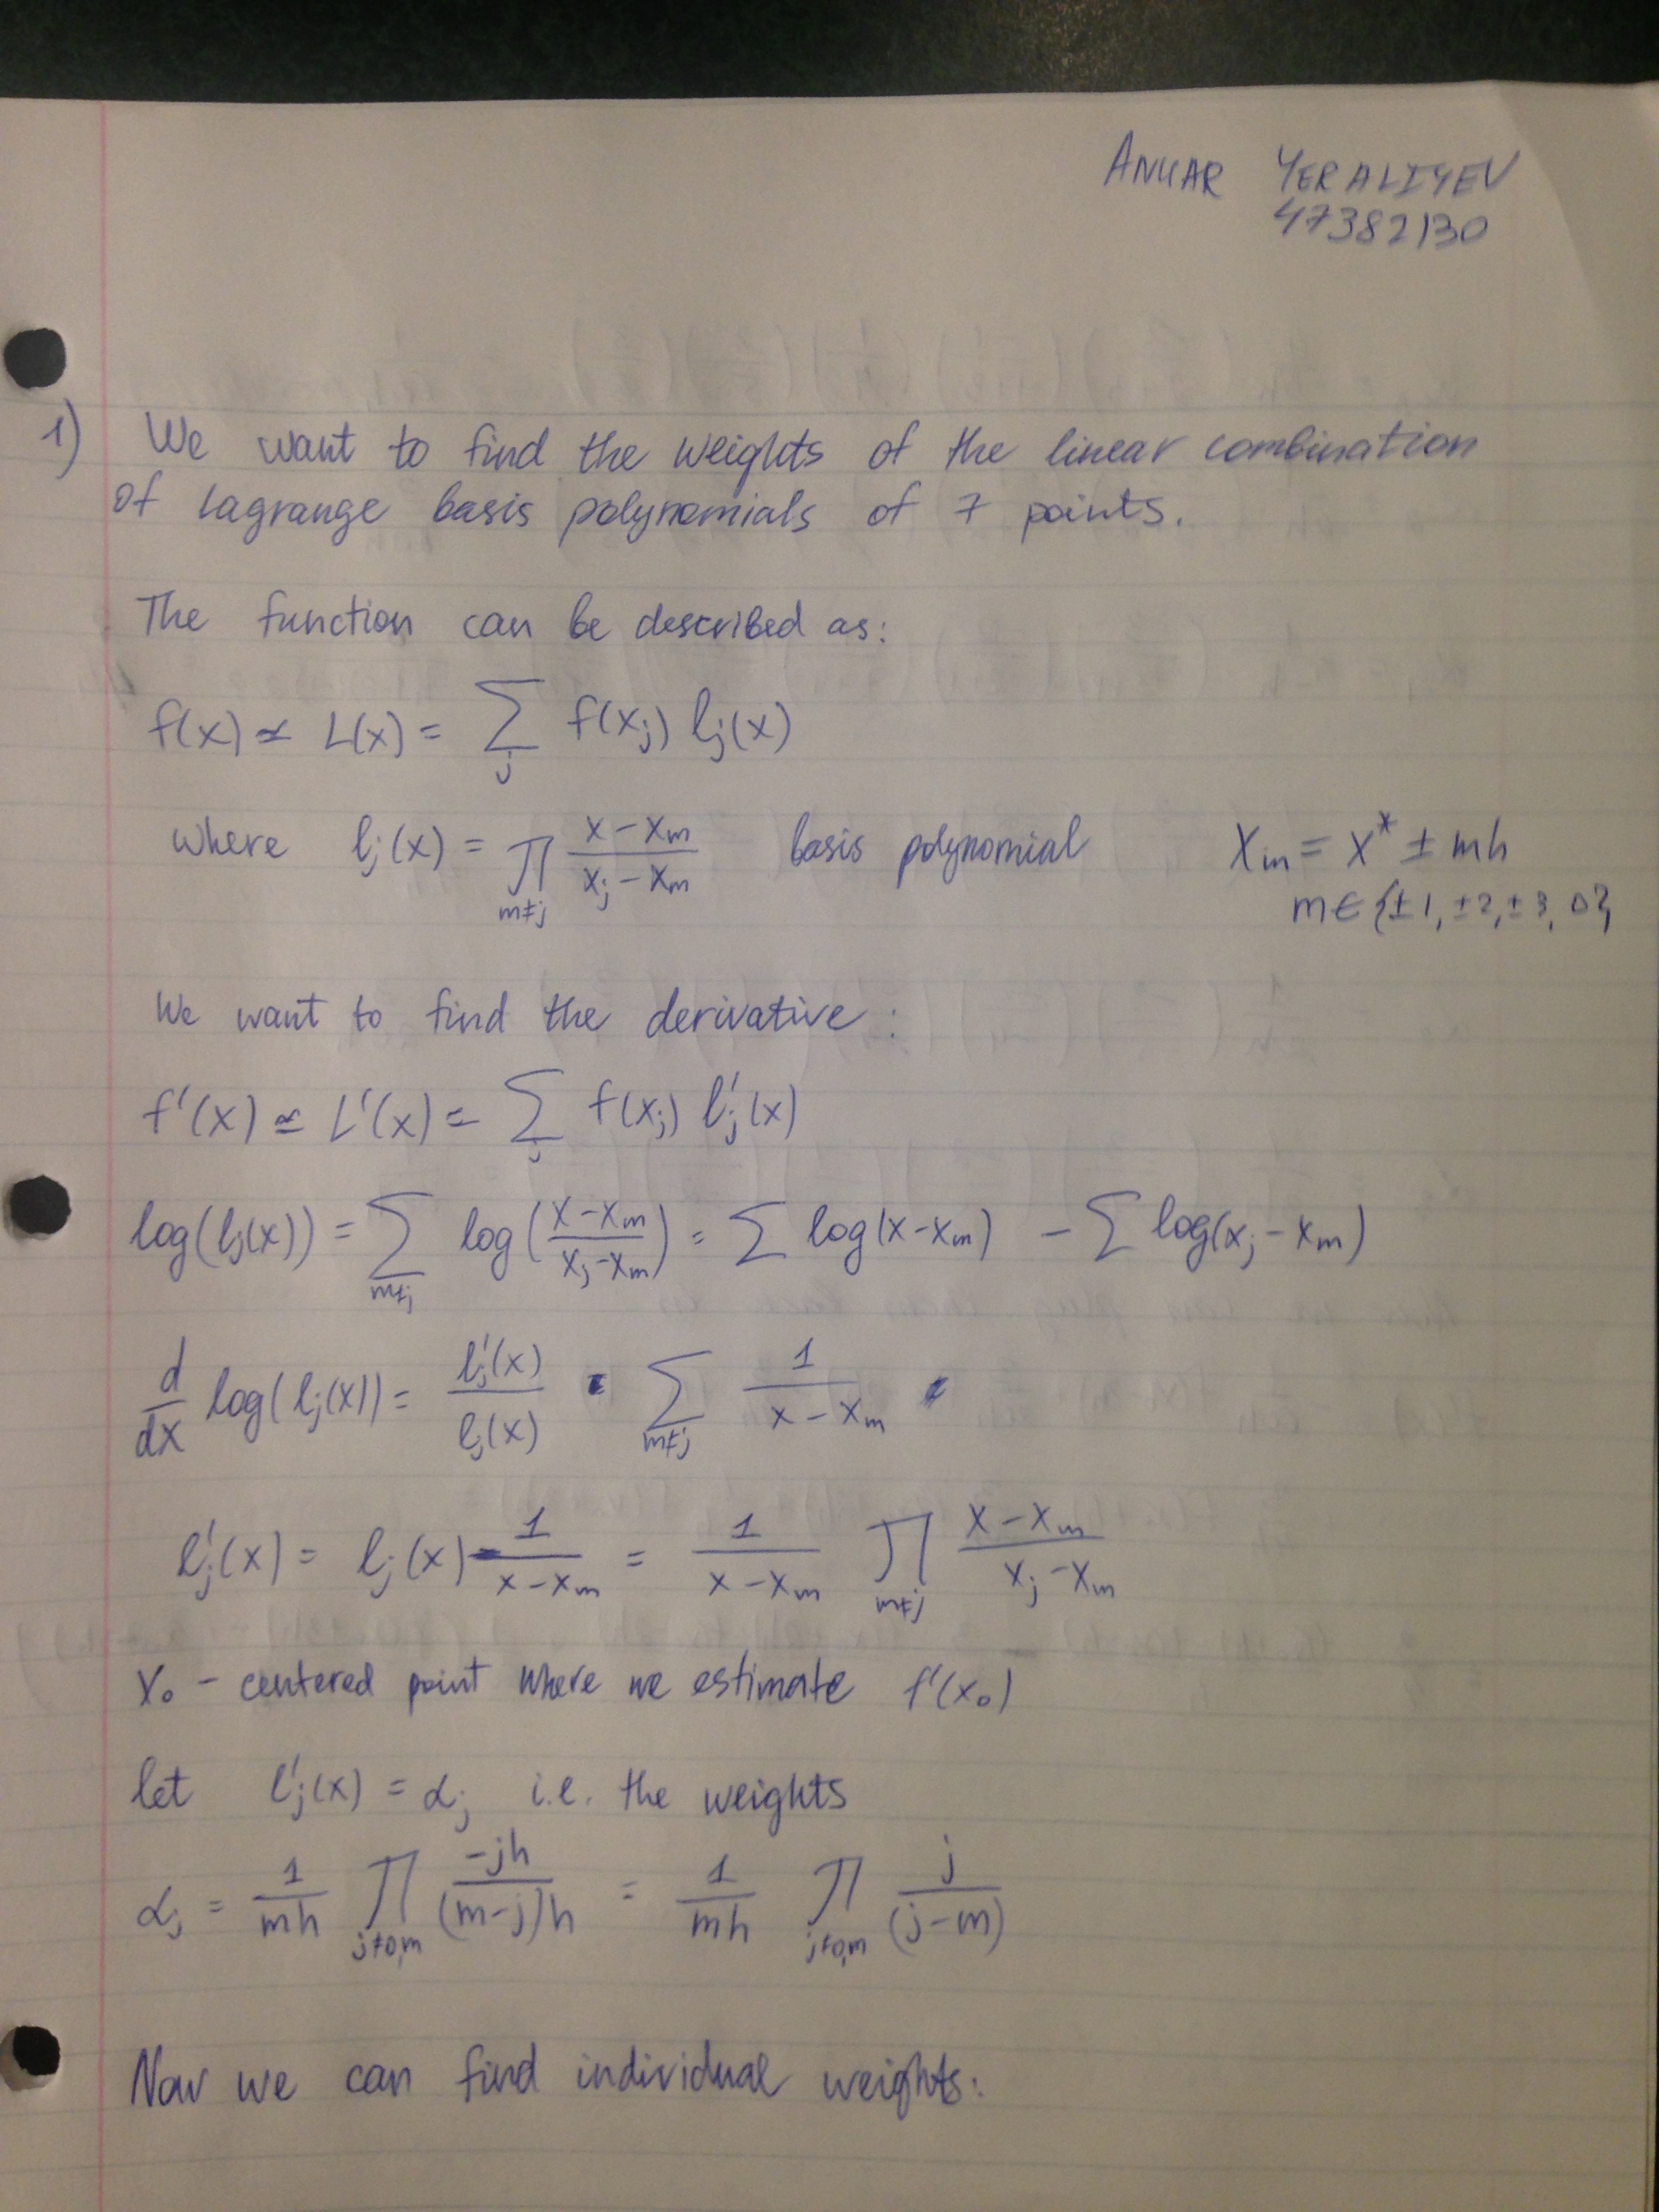

In [1]:
from IPython.display import Image
Image(filename='/Users/Anuar_The_Great/desktop/Courses/PHYS410/Assignments/IMG_2946.jpg',
     width=700)

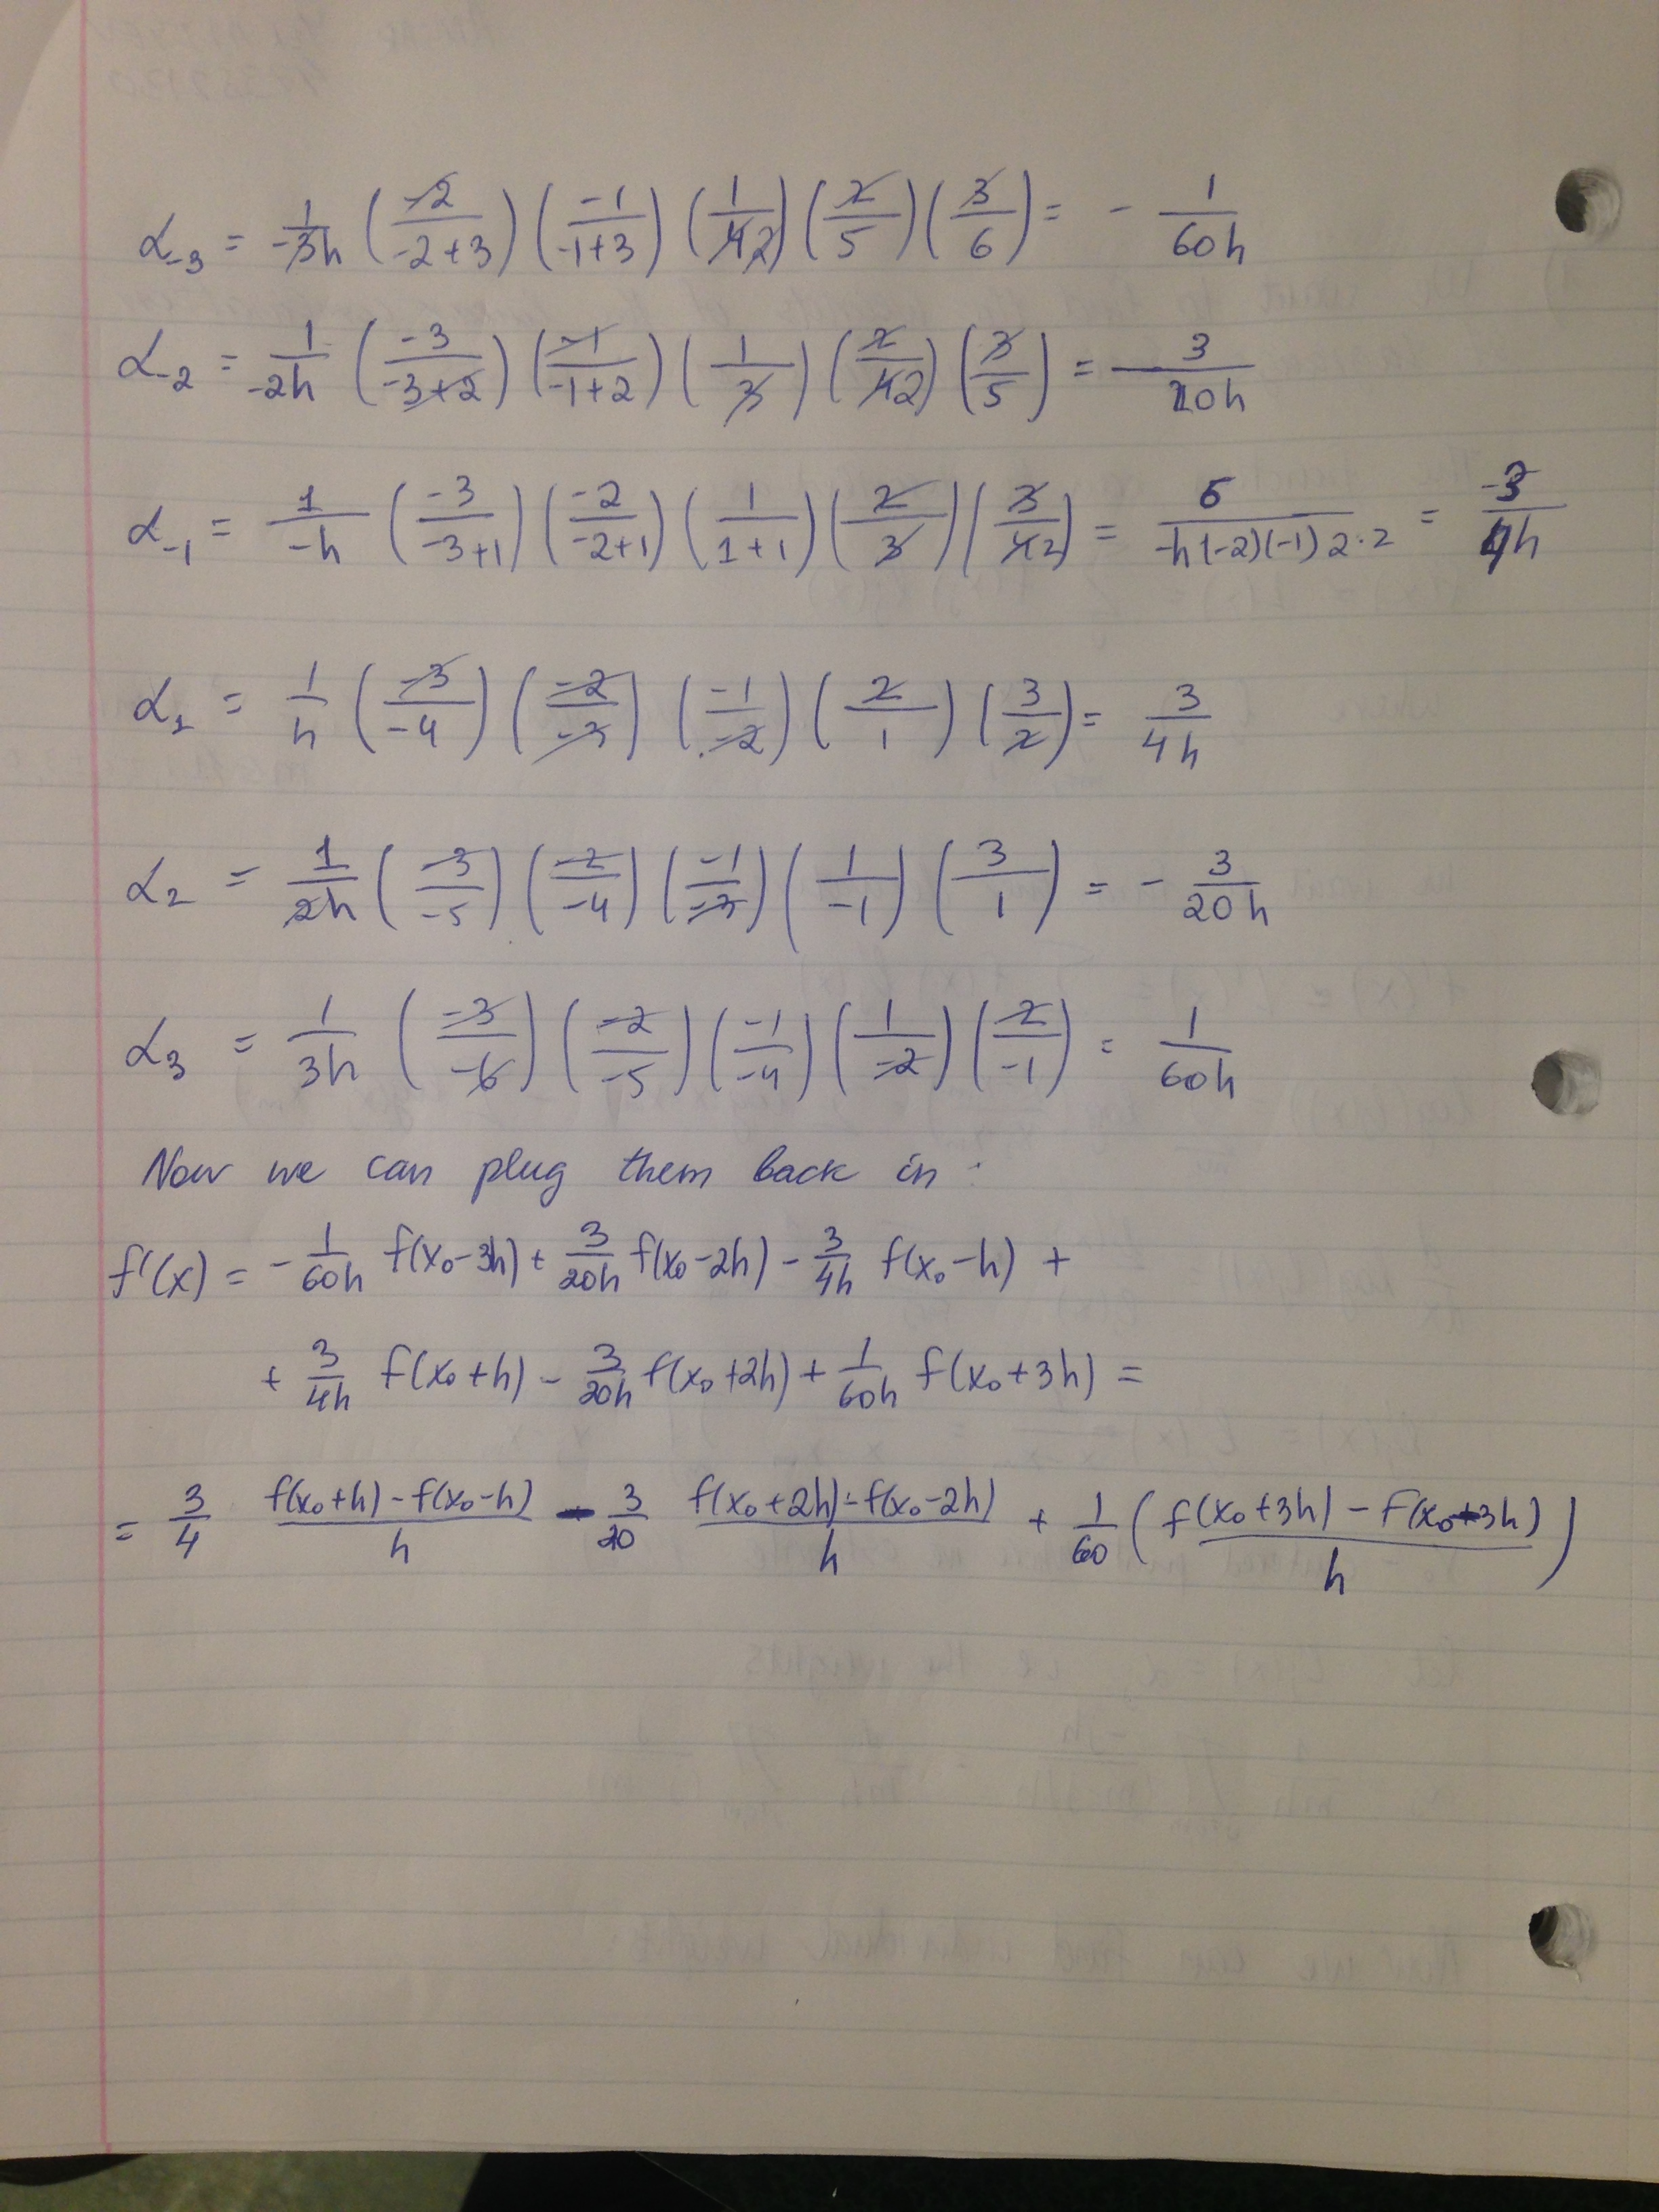

In [2]:
Image(filename='/Users/Anuar_The_Great/desktop/Courses/PHYS410/Assignments/IMG_2947.jpg',
     width=700)

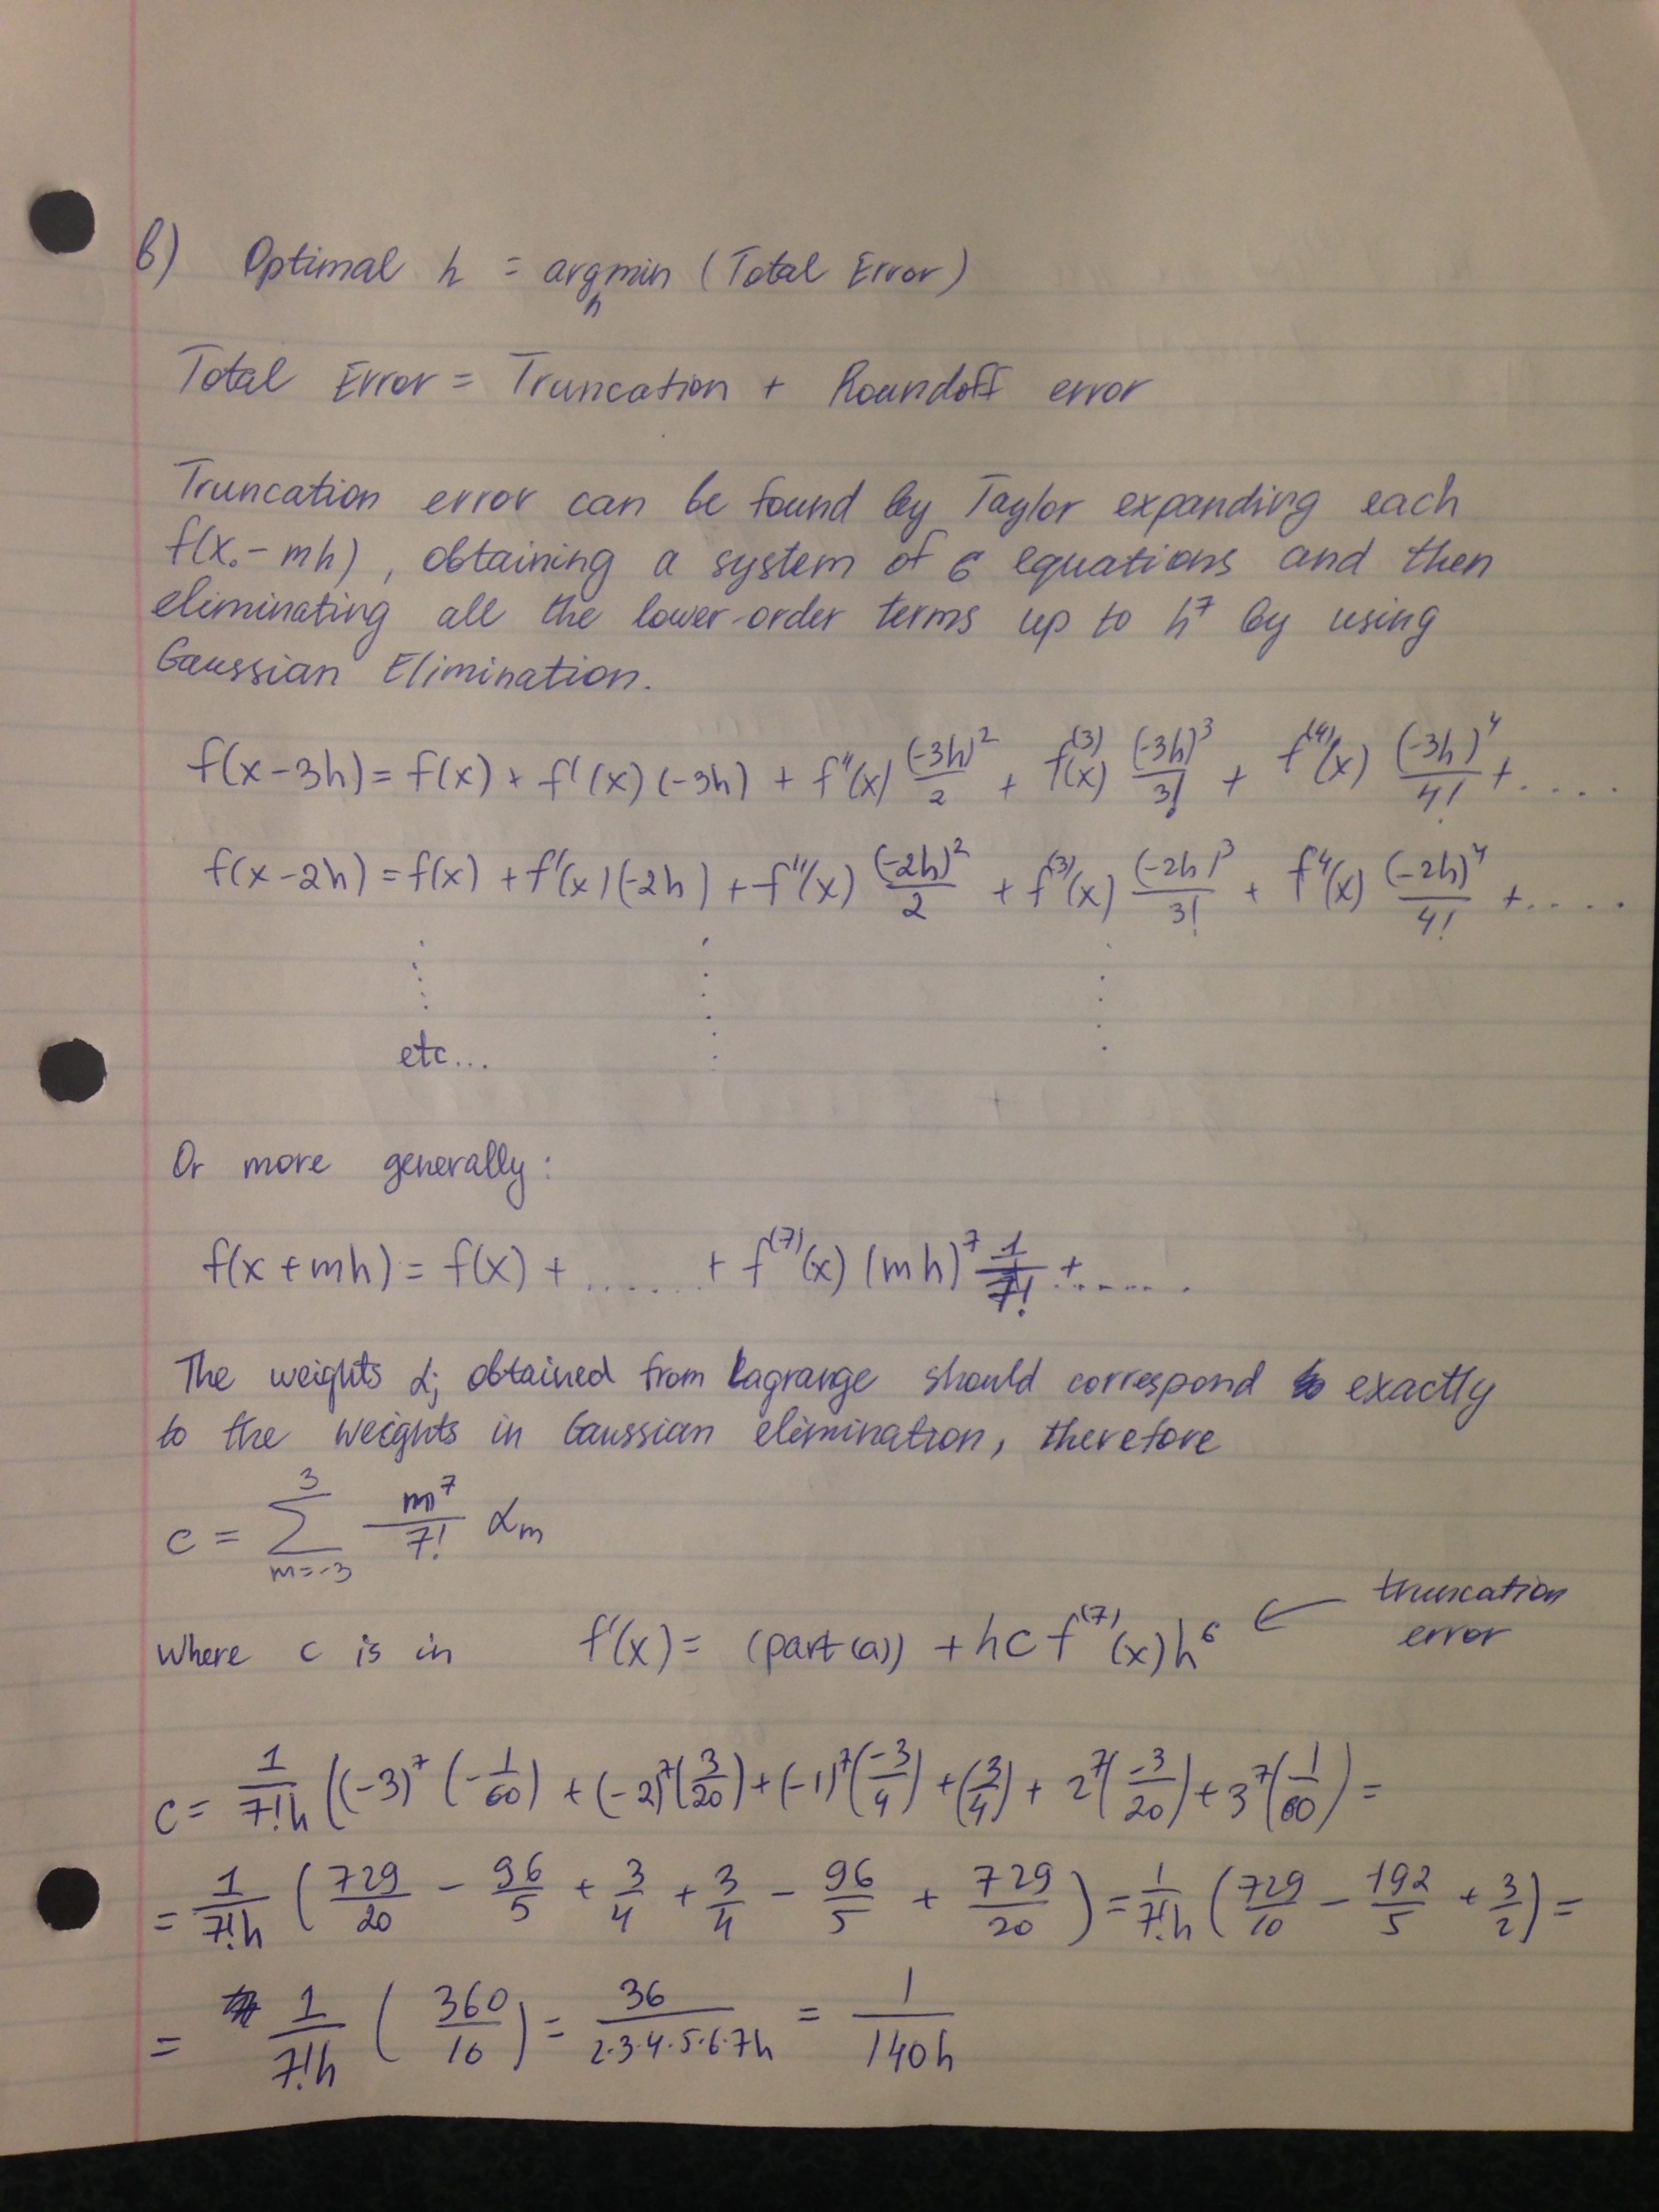

In [3]:
Image(filename='/Users/Anuar_The_Great/desktop/Courses/PHYS410/Assignments/IMG_2948.jpg',
     width=700)

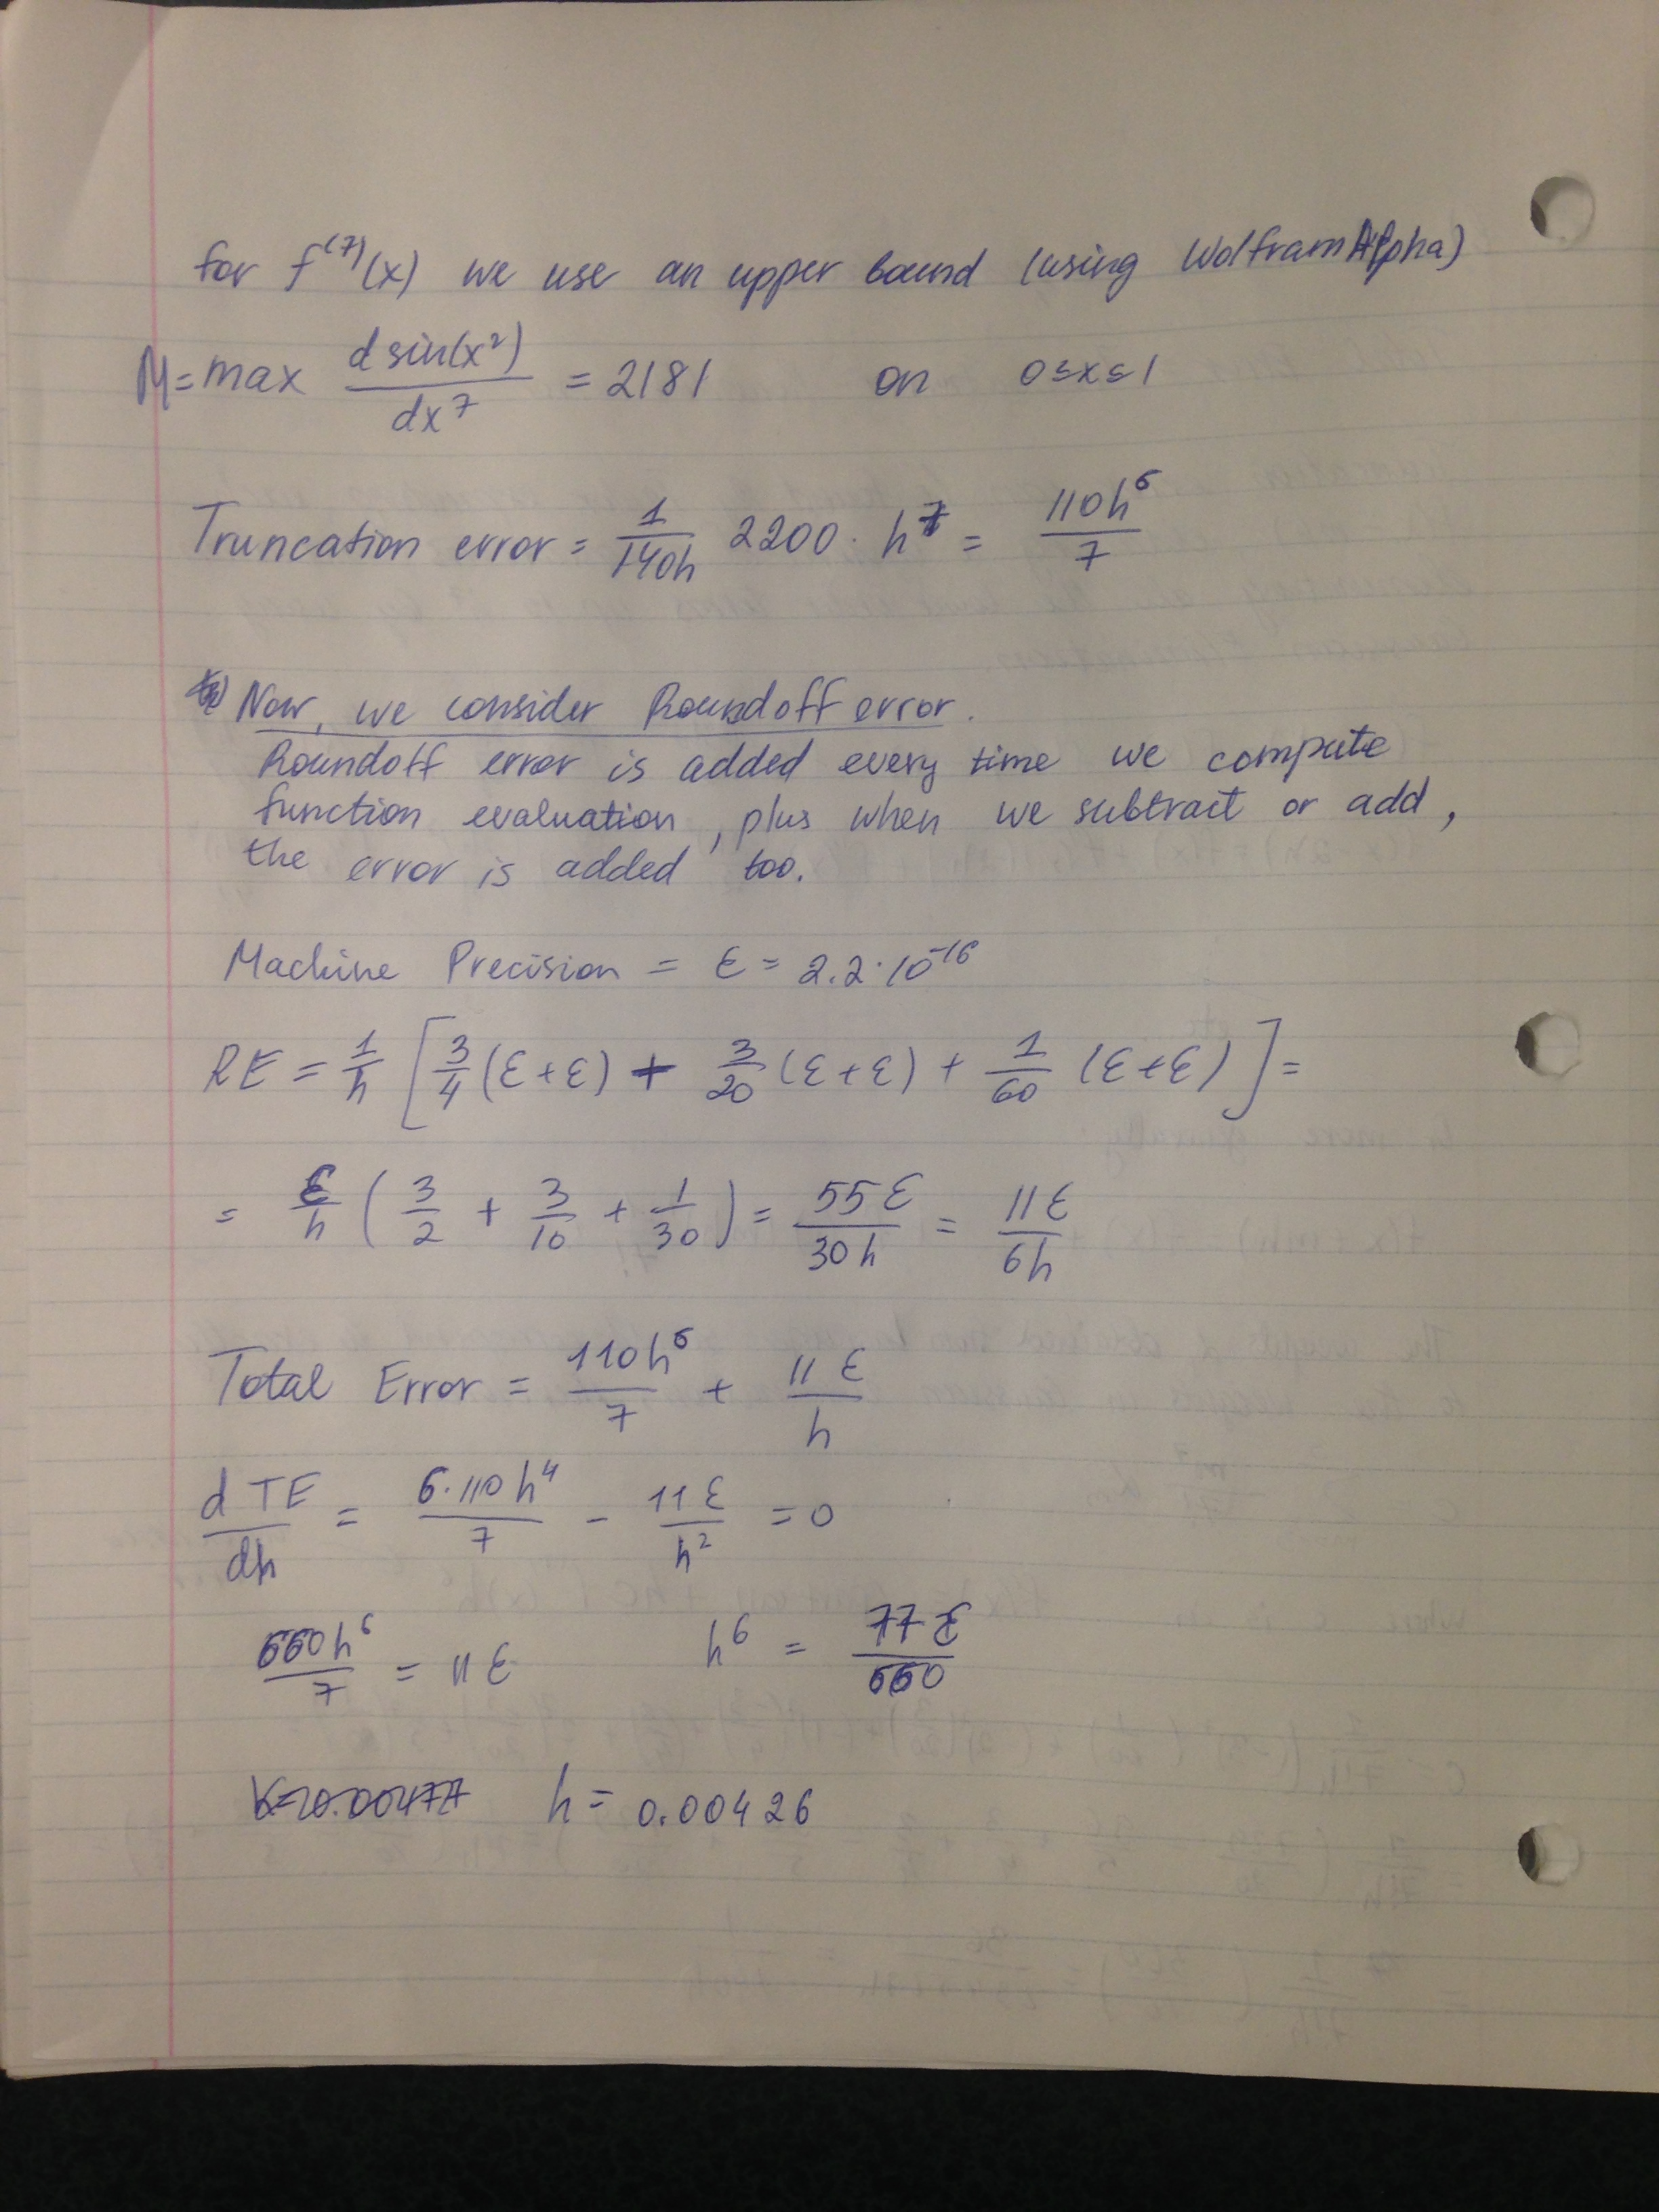

In [4]:
Image(filename='/Users/Anuar_The_Great/desktop/Courses/PHYS410/Assignments/IMG_2949.jpg',
     width=700)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
def func(x):
    return np.sin(np.square(x))

def func_prime(x):
    return 2 * x * np.cos(np.square(x))

def func_lagrange(x, h):
    temp = (3./4.) * (func(x+h) - func(x-h)) - (3./20.) * (func(x+2*h) - func(x-2*h)) +\
           (1./60.) * (func(x+3*h) - func(x-3*h))
    return temp / h

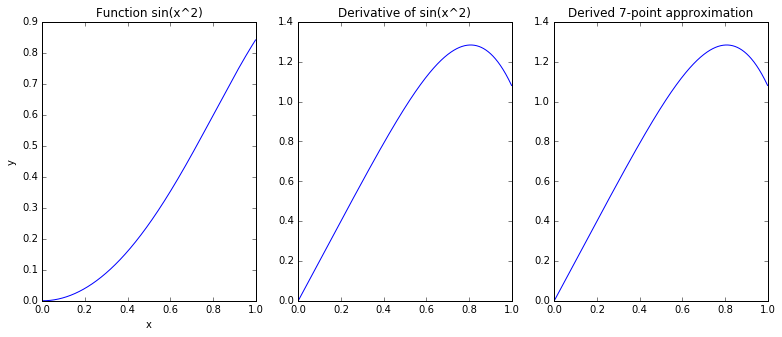

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(13, 5))
x = np.linspace(0, 1, 1000)
h = 0.001
axs[0].plot(x, func(x))
axs[1].plot(x, func_prime(x))
axs[2].plot(x, func_lagrange(x, h))
axs[0].set_title("Function sin(x^2)")
axs[1].set_title("Derivative of sin(x^2)")
axs[2].set_title("Derived 7-point approximation")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

In [9]:
eps = 2.2 * 10**-16

# Total Error = Truncation Error + Roundoff Error
def total_error(h):
    return 110 * h**6 / 7 + 11 * eps / h

# Absolute difference between the approximation and differentiated function
def diff(h):
    return np.abs(func_lagrange(0.5, h) - func_prime(0.5))

As can be noted from the graph, our derived Total Error is indeed an upper bound for the empirically obtained error. As well as the fact that our $h_{opt}$ matches the lowest of our upper bound function.

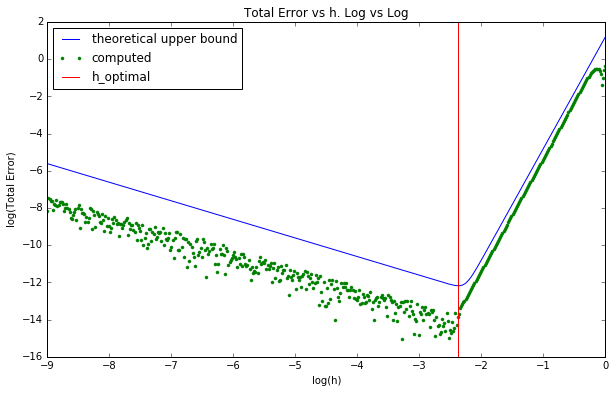

In [10]:
hs = np.logspace(-9, 0, 500)
plt.figure(figsize=(10,6))
plt.plot(np.log10(hs), np.log10(total_error(hs)), label='theoretical upper bound')
plt.plot(np.log10(hs), np.log10(diff(hs)), '.', label='computed')
plt.axvline(x=np.log10(0.00426), c='r', label='h_optimal')
plt.xlabel('log(h)')
plt.ylabel('log(Total Error)')
plt.title('Total Error vs h. Log vs Log')
plt.legend(loc='upper left')

## Exercise #2

In [11]:
def sine(x):
    return np.sin(x)

def trapezoid_integrate(func, a, b, h):
    integral = 0
    for i in range(int((b - a) // h)):
        integ = h * (func(a + h*i) + func(a + h*(i+1))) / 2
        integral += integ
    return integral

In [12]:
hs = [1, 0.5, 0.25, 0.125, 0.0625]
integrals = []
for h in hs:
    integrals.append(trapezoid_integrate(sine, 0, 1, h))
ints = np.matrix(integrals)
ints = np.transpose(ints)
print ints

[[ 0.42073549]
 [ 0.45008052]
 [ 0.45730094]
 [ 0.45909897]
 [ 0.45954804]]


In [13]:
# Returns a value of Romberg approximation in the table at position i and k
def romberg(integrals, i, k):
    if i == 0:
        return integrals[k, i]
    else:
        return (4.0**i * romberg(integrals, i-1, k) - romberg(integrals, i-1, k-1)) / (4.0**i - 1)

print "Accurate up to h^6: ", romberg(ints, 2, 2)

print "Actual value of the integral: ", (1 - np.cos(1))
print "Difference btw the two: ", romberg(ints, 2, 2) - (1 - np.cos(1))

Accurate up to h^6:  0.459697448598
Actual value of the integral:  0.459697694132
Difference btw the two:  -2.45534114318e-07


We can now compute the individual approximations using Richardson extrapolation on 2 points.
The formula used above was: $$ T^i_k = \frac{4T^{i-1}_k - T^{i-1}_{k-1}}{4^i - 1}$$

We first started with h=1, i.e. being the whole interval, then h was halved every iteration. First the first $T^0$ was computed for a set of different $h$ and the additional $T^i$ were found.



|       | $T^0$, $h^2$ | $T^1$, $h^4$| $T^2$, $h^6$ | $T^3$, $h^8$ |
|-------|-------|-------|-------|-------|
| $h$   | 0.420735492404     |       |       |       |
| $\frac{h}{2}$  | 0.450080515504     | 0.459862189871      |       |       |
| $\frac{h}{4}$  | 0.457300937572      | 0.459707744927      | $\textbf{0.459697448598}$      |       |
| $\frac{h}{8}$ | 0.459098973492      | 0.459698318798      | 0.45969769039      | 0.459697694228      |

The graph below shows that the absolute error increases as $h$ goes up, i.e. the difference between the step of the richardson extrapolation increases.

The first value that's computed up to the error of $h^6$ is 0.459697448598, which is in bold.
The True value is 1 - cos(1) = 

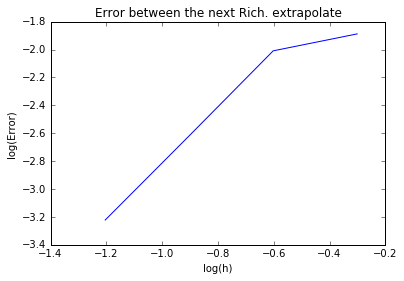

In [14]:
errors = []
for j in range(4):
    err = np.abs(romberg(ints, 0, j) - romberg(ints, 1, j))
    errors.append(err)

plt.plot(np.log10(hs[1:]), np.log10(errors))
plt.title("Error between the next Rich. extrapolate")
plt.xlabel('log(h)')
plt.ylabel('log(Error)')